## Importing important libraries.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("Dataset/cardio_train.csv",sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
print(f'Dataset Shape: {data.shape}')

Dataset Shape: (70000, 13)


### Assumptions

Below are some of the key assumptions that we can make about the data and will look to validate them with the data in hand.

- With the increase in age chances of heart disease increases.
- Effect of height and weight. We assume that with more BMI chances of heart diesease is more.
- ap_hi > ap_lo. With the increaes of bp the chances of heart attack are more. Check if we have patients with low bp but still have the disease.
- With increase of cholesterol the chances of heart disease increases as per scientific tests.
- Increase in blood glucose levels could be a cause of increased heart risk.
- Check about how patient drinking and smoking habbits would increase the chances of heart risk. Are drinking men/women more prone to having a heart disease ?
- Physical Activity is assumed to help in lower cholesterol and thus lower chances of heart disease.

### Feature Engineering Steps

- Use height and weight to calculate BMI of a patient and see if it has some impact on the target variable.
- Combine smoking and alcohol as a single feature using feature interaction.
- We can think of creating a feature based on age and gender of a person to check if he/she is more likely to have diseased.

### Code

In [4]:
# Identifying missing values and duplicates first.

data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
duplicates = len(data) - len(data.drop(['id'],axis=1).drop_duplicates())
data.drop(['id'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
print(f'{duplicates} duplicate records dropped.')

24 duplicate records dropped.


In [6]:
data.shape

(69976, 12)

From the above we can see that we do not have any missing values into our dataset and also have removed 24 duplicate records.

### Descriptive stats about data

In [7]:
print(f'{data.dtypes.value_counts()}')

int64      11
float64     1
dtype: int64


In [8]:
print('Let us now get a quick summary of features available.')
data.describe().T.round(2)  # transposed

Let us now get a quick summary of features available.


,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.95,2467.37,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.35,0.48,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.36,8.21,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.21,14.40,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.82,154.04,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.64,188.50,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.37,0.68,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.23,0.57,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.09,0.28,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.05,0.23,0.0,0.0,0.0,0.0,1.0


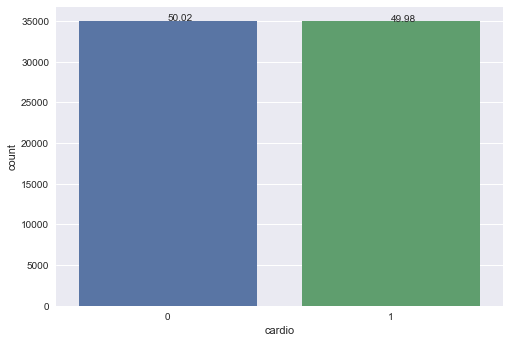

In [9]:
# Let us first have a look at our target variable and see if it is balanced or not 

fig, ax = plt.subplots(1,1)
sns.countplot(data['cardio'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}'.format((i.get_height()/len(data['cardio']))*100,'%'))
plt.show()

as we can see that the target variable is balanced

In [10]:
# Age is given in days. Transforming it into years for better understanding and checking relation with the target variable.

data['age'] = data['age']/365

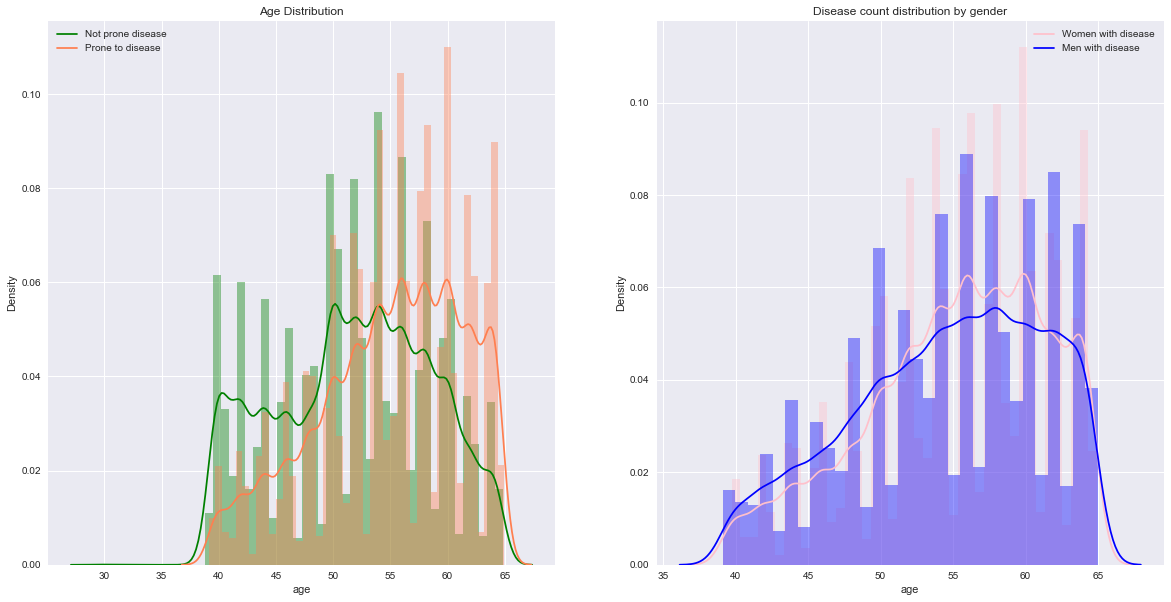

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data['age'][data['cardio']==0], ax = ax1, color='green')
sns.distplot(data['age'][data['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend(['Not prone disease', 'Prone to disease'])

sns.distplot(data['age'][(data['gender']==1) & (data['cardio']==1)],ax = ax2,color='pink', label='Woman with disease')
sns.distplot(data['age'][(data['gender']==2) & (data['cardio']==1)],ax = ax2,color='blue',label='Men with disease')
ax2.set_title('Disease count distribution by gender')
ax2.legend(['Women with disease', 'Men with disease'])
# fig.legend()
plt.show()

People above the age of 54 are more likely to have diseased than below, also males below 50 are more likely to have been diagnosed with heart disease than females which confirms our assumption, even though the difference is not that drastic.

### Height and disease

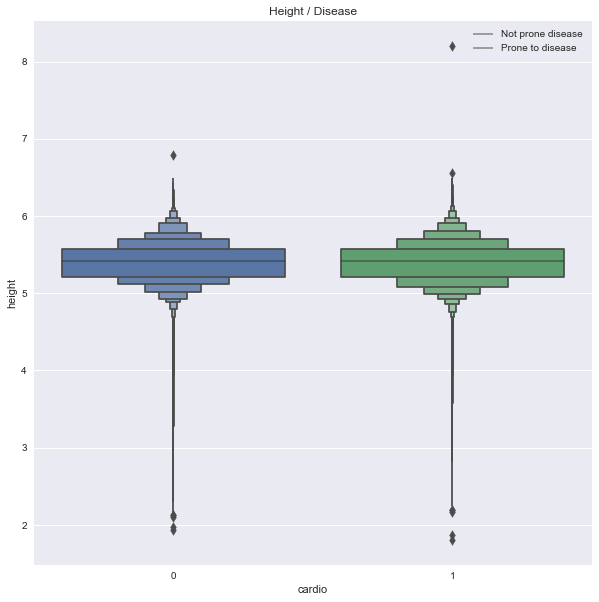

In [12]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(data['cardio'],(data['height']*0.0328084),ax=ax1)
ax1.set_title('Height / Disease')
ax1.legend(['Not prone disease', 'Prone to disease'])
plt.show()

From the above plot we can see that there are certain outliers in the feature. For eg: There are persons with more than 8 foot height which definitely looks and outlier Also, there are few with even less then 3 foot in height which could be children. To confirm this we need to check their weight and age and decide if they are outliers or could be a valid entry.

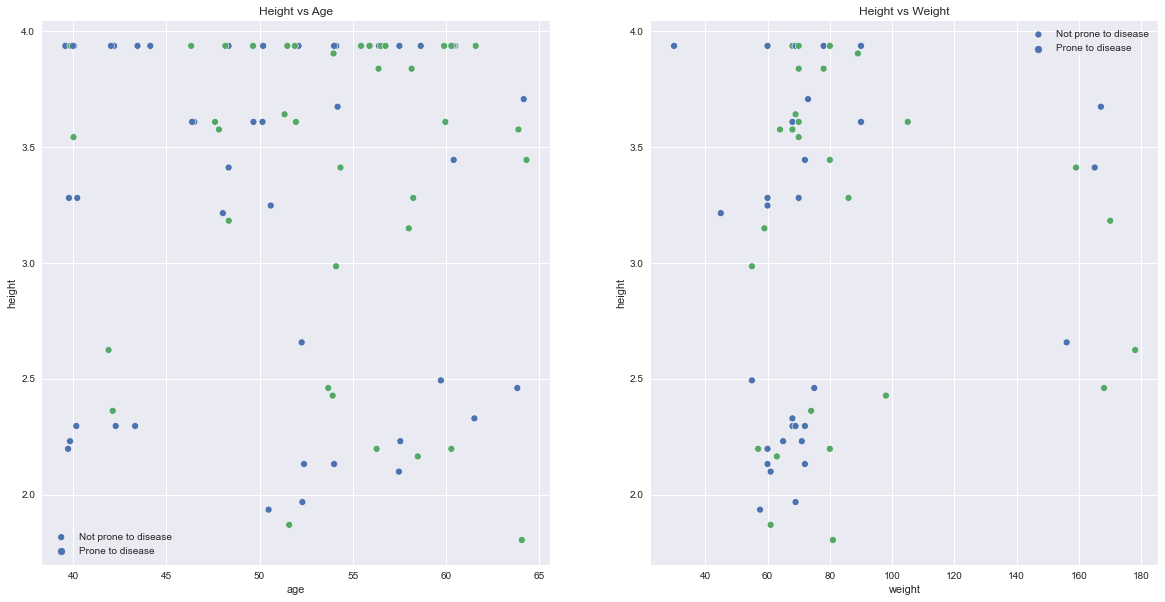

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(data['age'],data['height'][(data['height']*0.0328084)<4]*0.0328084,hue=data['cardio'],ax=ax1)
ax1.set_title('Height vs Age')
ax1.legend(['Not prone to disease', 'Prone to disease'])
sns.scatterplot(data['weight'],data['height'][(data['height']*0.0328084)<4]*0.0328084,hue=data['cardio'],ax=ax2)
ax2.set_title('Height vs Weight')
ax2.legend(['Not prone to disease', 'Prone to disease'])
plt.show()

From the above we can see that the people with below 4 foot in height are mostly aged above 40 and have a weight above 40kg mostly. This definitely confirms that they are not children. Now for our analytical purposes we can delete such records from our data as they are hinting more towards outliers

In [14]:
# Converting height in cms to foot.

data['height'] = data['height']*0.0328084 
filt =(data['height']>8) | (data['height']<3) 

data.drop(index = list(data[filt].index),inplace=True)
print(f'Dataset: {data.shape}')

Dataset: (69950, 12)


### height vs weight

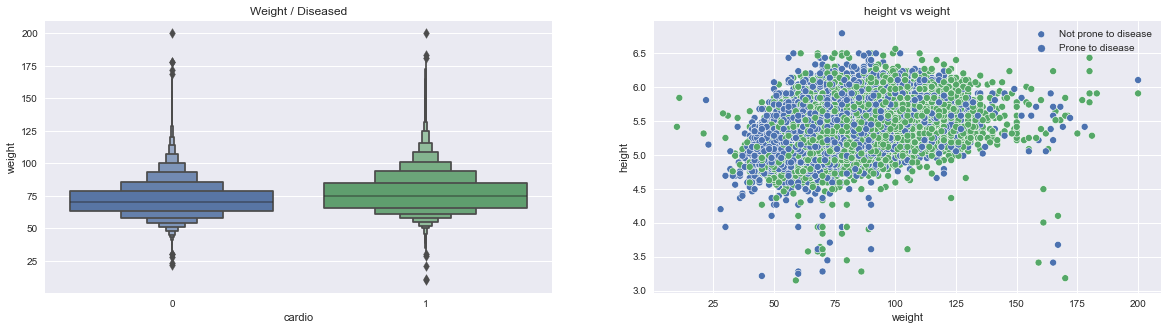

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxenplot(data['cardio'],(data['weight']),ax=ax1)
ax1.set_title('Weight / Diseased')
sns.scatterplot(data['weight'],data['height'],ax=ax2,hue=data['cardio'])
ax2.set_title('height vs weight')
ax2.legend(['Not prone to disease', 'Prone to disease'])
plt.show()

From the above plots we can see that there are persons with more than 155 kgs of weight with height less than 4.5 foot which seems like a bit abnormal. Also, there are people with less than 25kg of weight and there are ones with more than 175 kg of weight which looks like an outlier to me. We will eliminate all such records from our analysis.

In [16]:
# 1. Weight < 25 kg
filt1 = data['weight']<25
data.drop(index=list(data[filt1].index),inplace=True)

# 2. Weight > 175 kg
filt2 = data['weight']>175
data.drop(index=list(data[filt2].index),inplace=True)

# 3. Height < 4.5 & Weight > 150 kg
filt3 = (data['height']<4.5) & (data['weight']>150)
data.drop(index=list(data[filt3].index),inplace=True)

In [17]:
data.shape

(69927, 12)

###  Gender

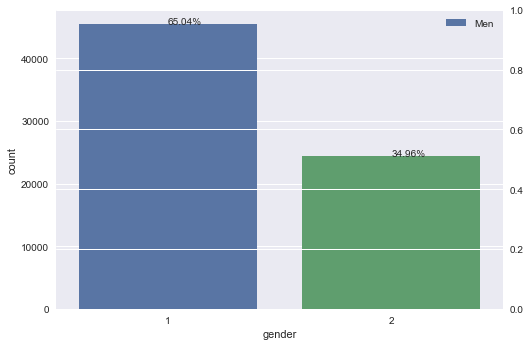

In [18]:
fig,(ax) = plt.subplots(1,1)
tmp = pd.crosstab(data['gender'],data['cardio'],normalize='index').round(4)*100
tmp.reset_index()
tmp.columns = ['Not Diseased','Diseased']
ax1 = sns.countplot(data['gender'],order = list(tmp.index))
ax2 = ax1.twinx()
ax1.legend(['Men', 'Women'])
# sns.pointplot(tmp.index,tmp['Diseased'],order = list(tmp.index),ax=ax2, color='red', linestyles='-')
for x in ax1.patches:
    height = x.get_height()
    ax1.text(x.get_x()+x.get_width()/2,height,'{:.2f}{}'.format((height/len(data))*100,'%'))
plt.show()

Looks like men are more likely to have diseased then women.


In [19]:
filt = (data['ap_hi']<90) | (data['ap_hi']>140)
print(f'Normal systolic blood pressure range is between 90 and 120. However, from our dataset we can see that we have {len(data[filt])} records that are not falling within the normal range. We can replace them with their median values.')

Normal systolic blood pressure range is between 90 and 120. However, from our dataset we can see that we have 10206 records that are not falling within the normal range. We can replace them with their median values.


In [20]:
data['ap_hi'].replace(data[filt]['ap_hi'].values,data['ap_hi'].median(),inplace=True)

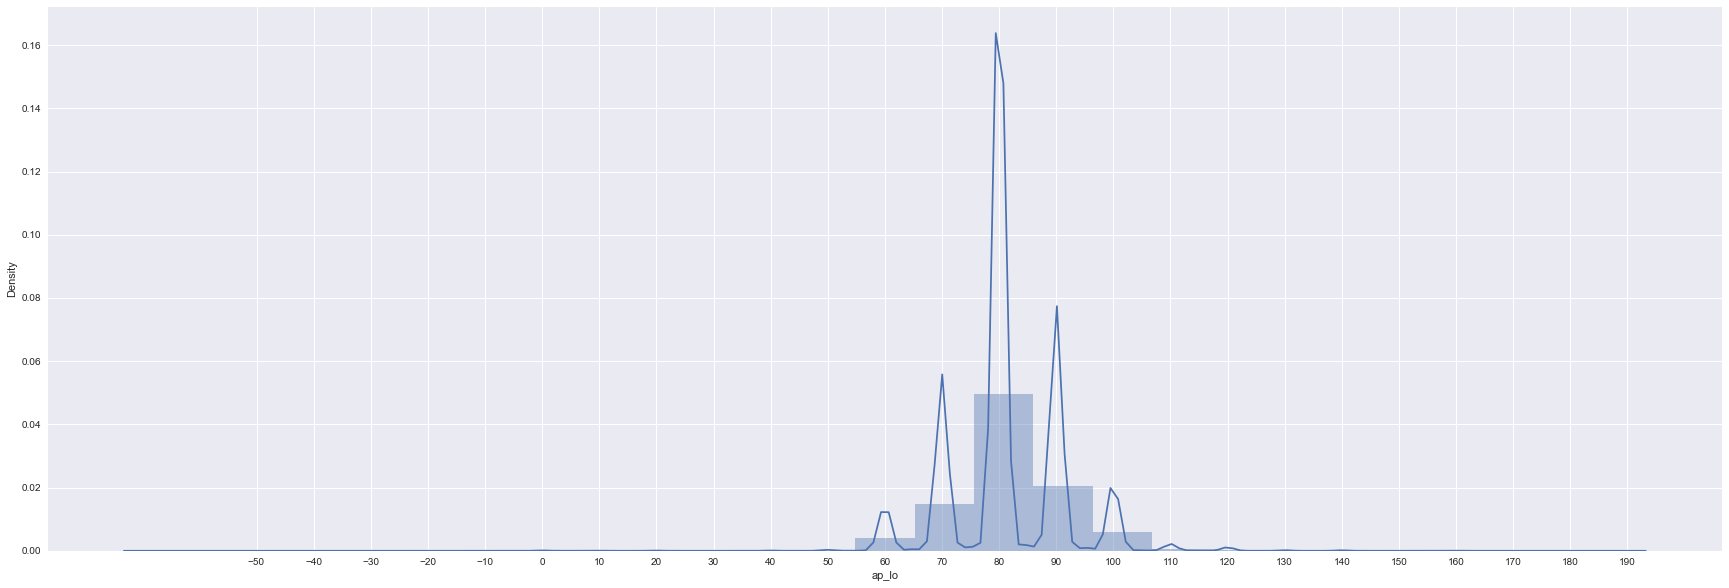

Similar to Systolic Blood Pressure Range the diastolic bp range should be between 60-90 for a healthy individual. However, in this case we have median values for AP_LO as 80.0 which does not look correct to me. Considering this in mind we would have to do some further analysis if the data source is correct or not.


In [21]:
# filt =  (data['ap_lo']>90) | (data['ap_lo']<60)
fig, ax = plt.subplots(1,1, figsize = (30,10))
sns.distplot(data['ap_lo'][data['ap_lo']<200],bins = 25, kde = True, ax = ax)
xticks = [i*10 for i in range(-5,20)]
ax.set_xticks(xticks)
# ax.tick_params(x,labelrotation='v')
plt.show()
print(f'Similar to Systolic Blood Pressure Range the diastolic bp range should be between 60-90 for a healthy individual. However, in this case we have median values for AP_LO as {data.ap_lo.median()} which does not look correct to me. Considering this in mind we would have to do some further analysis if the data source is correct or not.')

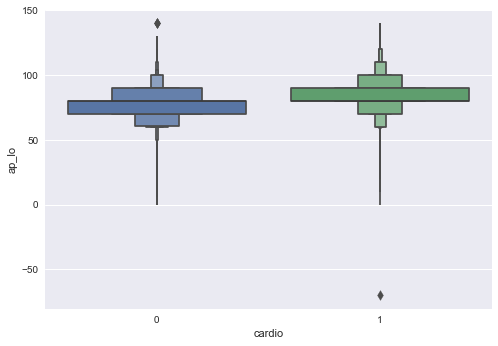

In [22]:
sns.boxenplot(data['cardio'],data['ap_lo'][data['ap_lo']<150])
plt.show()

### Cholesterol



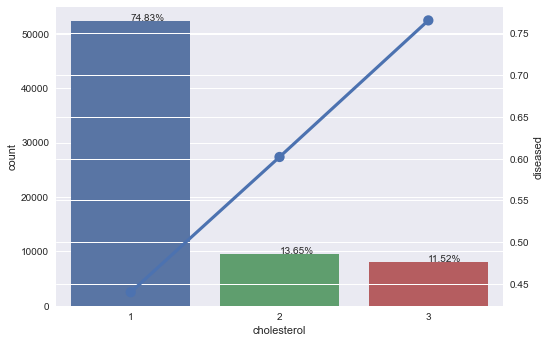

In [23]:
tmp = pd.crosstab(data['cholesterol'],data['cardio'],normalize='index')
tmp.reset_index()
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1)
sns.countplot(data['cholesterol'],order=list(tmp.index), ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],order=list(tmp.index),ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['cholesterol'])*100,'%'))
plt.show()

The above plot shows that cholesterol has a great impact over the diseased state of a person.

### Glocose 

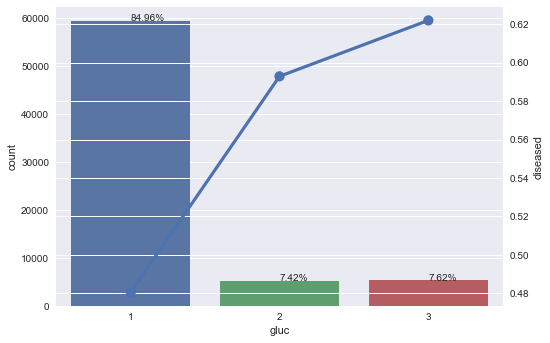

In [24]:
tmp = pd.crosstab(data['gluc'],data['cardio'],normalize='index')
tmp.reset_index()
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1)
sns.countplot(data['gluc'],order=list(tmp.index), ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],order=list(tmp.index),ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['gluc'])*100,'%'))
plt.show()

### To-Do (WIP)
Feature engineer the smoking and the drinking habits of a person to find out if there is any relation between the habits and the risk of disease

### BMI
Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres. [Source](https://en.wikipedia.org/wiki/Body_mass_index)

In [25]:
# adding a new BMI column
data['BMI'] = data['weight']/(((data['height']/0.0328084)*.01)**2) 

In [26]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,5.511811,62.0,110.0,80,1,1,0,0,1,0,21.967120
1,55.419178,1,5.118110,85.0,140.0,90,3,1,0,0,1,1,34.927679
2,51.663014,1,5.413386,64.0,130.0,70,3,1,0,0,0,1,23.507805
3,48.282192,2,5.544620,82.0,120.0,100,1,1,0,0,1,1,28.710479
4,47.873973,1,5.118110,56.0,100.0,60,1,1,0,0,0,0,23.011177


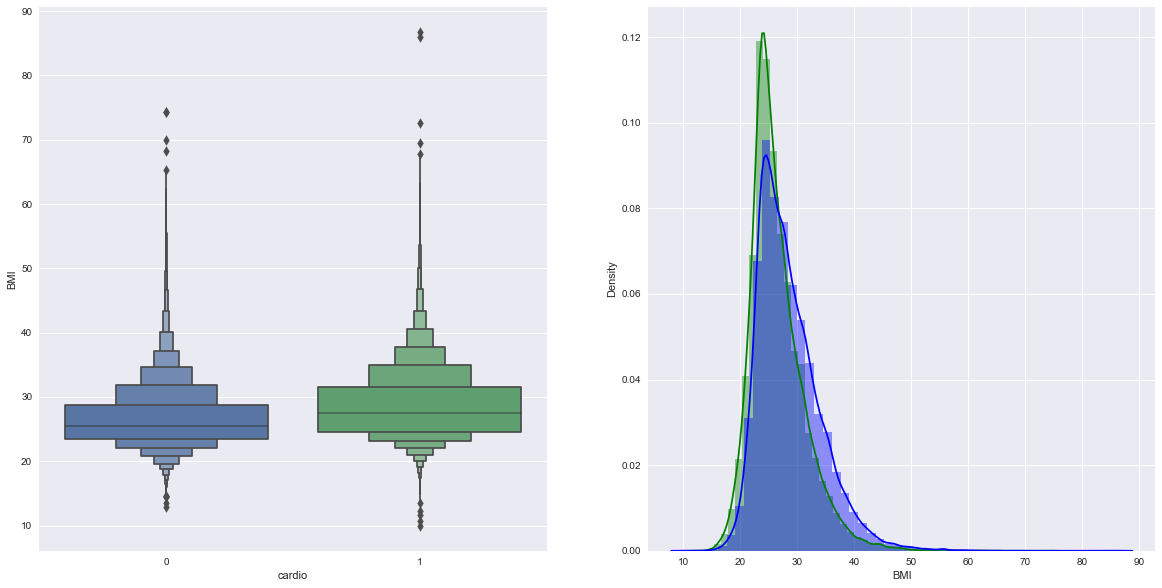

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.boxenplot(data['cardio'],data['BMI'],ax=ax1)
sns.distplot(data[data['cardio']==0]['BMI'],color='g',ax=ax2)
sns.distplot(data[data['cardio']==1]['BMI'],color='b',ax=ax2)
plt.show()

From the above plot we can see that chances of people getting diseased is more when there BMI increases beyond 25.


***************************************  END OF EDA 1  **********************************************************************

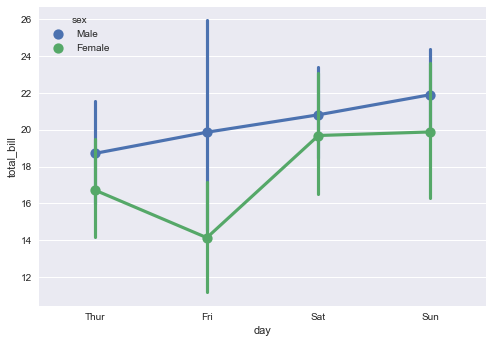

In [32]:
# # Load example tips dataset
# tips = sns.load_dataset("tips")

# # Create a point plot with "day" on x-axis, "total_bill" on y-axis, and "sex" as hue
# sns.pointplot(x="day", y="total_bill", hue="sex", data=tips)

# # Show the plot
# plt.show()

<AxesSubplot:xlabel='Smoking & Alcohol', ylabel='BMI'>

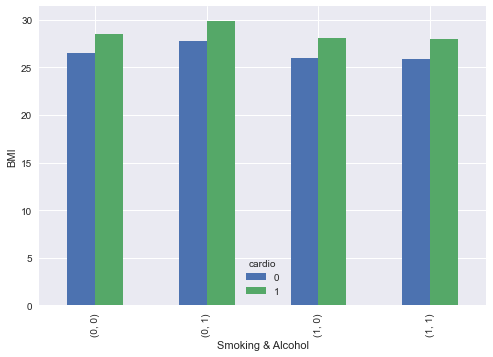

In [41]:
data.pivot_table(index=['smoke', 'alco'], columns='cardio', values='BMI').plot(kind='bar', xlabel='Smoking & Alcohol', ylabel='BMI')

In [40]:
data.pivot_table(index=['smoke', 'alco'], columns='cardio', values='BMI')

cardio              0          1
smoke alco                      
0     0     26.506750  28.501795
      1     27.777998  29.923596
1     0     25.979782  28.072302
      1     25.838108  27.953847

In [34]:
data.pivot_table(index=['smoke', 'alco'], columns='cardio', values='weight')

cardio              0          1
smoke alco                      
0     0     71.175080  76.258034
      1     75.678681  82.031062
1     0     74.160995  80.562530
      1     74.644693  80.777184

In [39]:
data.groupby(['smoke', 'alco'])['active'].plot(kind='bar')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C698249B80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
data.groupby(['smoke', 'alco'])['active'].sum()